본 노트북 파일은 데이터셋의 Loudness의 전반적인 분포를 알아보고, 정규화를 진행하고자 하기 위해 작성되었다. 

기본적으로 아래의 Google Docs에서 전반적인 조사 및 정규화 방법에 대해 확정을 지은 뒤에, 실제로 본 파일에서 정해진 방식에 따라 수행을 할 예정이다. 

[링크] https://docs.google.com/document/d/1xM3NNoK2mFAkDHbtQUC0TCJw1Trb4qIo9_tAZyoxHq4/edit#  
  
(작성일자: 2023-05-03) 

In [1]:
pip install pyloudnorm

Note: you may need to restart the kernel to use updated packages.


In [15]:
import soundfile as sf
import pyloudnorm as pyln
import numpy as np

In [3]:
data, rate = sf.read("save/groundtruth/mackenzie/vocal/train/19 You + Me - Dan + Shay Cover [3uQFeJuPxKQ]_0.wav") # load audio (with shape (samples, channels))
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data) # measure loudness


In [4]:
loudness

-28.886394748276587

In [2]:
import os

def get_all_files_in_directory(directory_path):
    all_files = []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path):
            all_files.append(file_path)
    return all_files

guitar_path = "segments/mackenzie/guitar"
vocal_path = "segments/mackenzie/vocal"

all_guitar_segments = get_all_files_in_directory(guitar_path)
all_vocal_segments = get_all_files_in_directory(vocal_path)

In [6]:
loudness_guitar = []
loudness_vocal = []

for val in all_guitar_segments:
    data, rate = sf.read(val) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness_guitar.append(meter.integrated_loudness(data)) # append the loudness value

In [7]:
for val in all_vocal_segments:
    data, rate = sf.read(val) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness_vocal.append(meter.integrated_loudness(data)) # append the loudness value

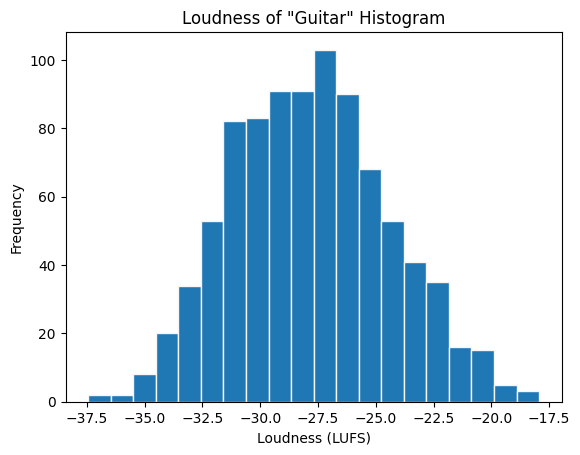

In [31]:
import matplotlib.pyplot as plt

plt.hist(loudness_guitar, bins=20, edgecolor = 'whitesmoke')
plt.xlabel('Loudness (LUFS)')
plt.ylabel('Frequency')
plt.title('Loudness of "Guitar" Histogram')
plt.show()

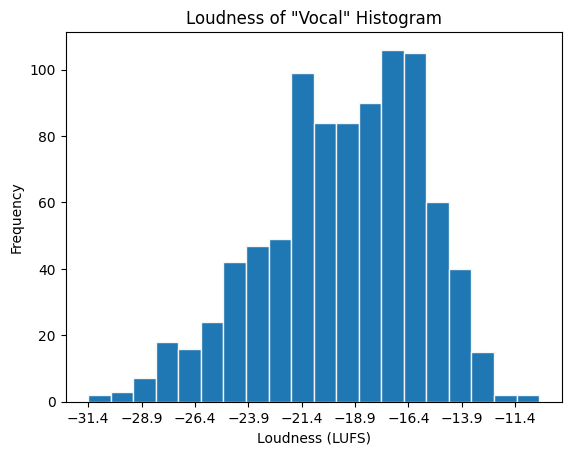

In [32]:
n, bins, patches = plt.hist(loudness_vocal, bins=20, edgecolor = 'whitesmoke')
plt.xticks(np.arange(min(bins), max(bins), 2.5))
plt.xlabel('Loudness (LUFS)')
plt.ylabel('Frequency')
plt.title('Loudness of "Vocal" Histogram')
plt.show()

Vocal과 Guitar의 Loudness의 75% 분위수를 구하기 (Percentile 75% 혹은 Quantile 25%)

In [36]:
vocal_quantile_25 = np.quantile(loudness_vocal, 0.25)
guitar_quantile_25 = np.quantile(loudness_guitar, 0.25)

print(f"vocal quantile 25%: {vocal_quantile_25}")
print(f"guitar quantile 25%: {guitar_quantile_25}")

vocal quantile 25%: -21.740450360684342
guitar quantile 25%: -30.29331666089164


Vocal Segments LUFS를 -21.7 LUFS로 Normalize 하기

In [47]:
for val in all_vocal_segments:
    data, sample_rate = sf.read(val) # load audio
    file_path = val[:9]+"mackenzie_norm/vocal_norm"+val[24:]
    
    # measure the loudness first 
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data)

    # loudness normalize audio to -21.7 dB LUFS
    loudness_normalized_audio = pyln.normalize.loudness(data, loudness, -21.7)
    sf.write(file_path, loudness_normalized_audio, sample_rate)

/home/hounsu/anaconda3/envs/svg/lib/python3.9/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
/home/hounsu/anaconda3/envs/svg/lib/python3.9/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


Guitar Segments LUFS를 -30.3 LUFS로 Normalize하기

In [48]:
for val in all_guitar_segments:
    data, sample_rate = sf.read(val) # load audio
    file_path = val[:9]+"mackenzie_norm/guitar_norm"+val[25:]
    
    # measure the loudness first 
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data)

    # loudness normalize audio to -30.3 dB LUFS
    loudness_normalized_audio = pyln.normalize.loudness(data, loudness, -30.3)
    sf.write(file_path, loudness_normalized_audio, sample_rate)

/home/hounsu/anaconda3/envs/svg/lib/python3.9/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


In [42]:
guitar_norm_path = "segments/mackenzie_norm/guitar_norm"
vocal_norm_path = "segments/mackenzie_norm/vocal_norm"

all_guitar_norm_segments = get_all_files_in_directory(guitar_norm_path)
all_vocal_norm_segments = get_all_files_in_directory(vocal_norm_path)

In [49]:
loudness_guitar_norm = []
loudness_vocal_norm = []

for val in all_guitar_norm_segments:
    data, rate = sf.read(val) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness_guitar_norm.append(meter.integrated_loudness(data)) # append the loudness value
    
for val in all_vocal_norm_segments:
    data, rate = sf.read(val) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness_vocal_norm.append(meter.integrated_loudness(data)) # append the loudness value

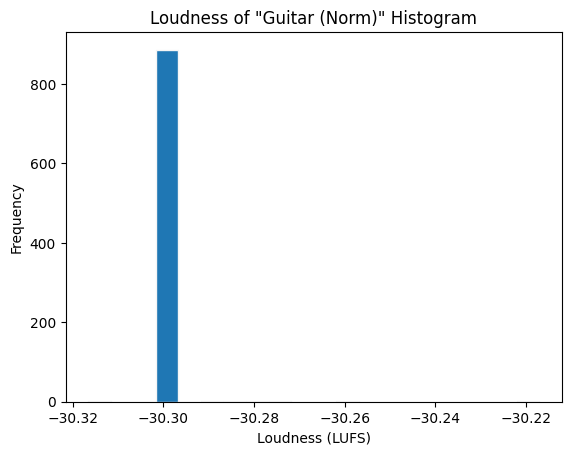

In [50]:
plt.hist(loudness_guitar_norm, bins=20, edgecolor = 'whitesmoke')
plt.xlabel('Loudness (LUFS)')
plt.ylabel('Frequency')
plt.title('Loudness of "Guitar (Norm)" Histogram')
plt.show()

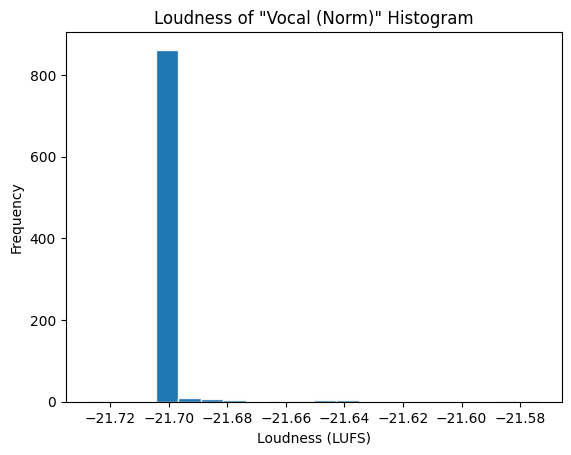

In [51]:
plt.hist(loudness_vocal_norm, bins=20, edgecolor = 'whitesmoke')
plt.xlabel('Loudness (LUFS)')
plt.ylabel('Frequency')
plt.title('Loudness of "Vocal (Norm)" Histogram')
plt.show()

노이즈 제거

In [3]:
dataset = [
    "Times Like These - Foo Fighters Cover [5MQWqJzi7LM]_0.wav",
    'Too Good At Goodbyes - Sam Smith Cover [SZrmL_dfM8o]_3.wav',
    'Too Good At Goodbyes - Sam Smith Cover [SZrmL_dfM8o]_4.wav',
    'Too Good At Goodbyes - Sam Smith Cover [SZrmL_dfM8o]_5.wav',
    'Two Ghosts - Harry Styles Cover [mpWUkRQoYm4]_4.wav',
    'Two Ghosts - Harry Styles Cover [mpWUkRQoYm4]_10.wav',
    'Ultimate Pop Medley! [gTziWaeMYgM]_5.wav',
    'Vienna - Billy Joel Cover [LDS2ll9XEFA]_1.wav',
    'What About Us - P!nk Cover [sWAkCG9rAsQ]_16.wav',
    'When We Were Young - Adele Cover [ao7Et8ZqXfs]_6.wav',
    'Wherever Is Your Heart - Brandi Carlile Cover [H-fO8K3zrTs]_6.wav',
    'You Are In Love - Taylor Swift Cover [q5mOOuIKeYc]_2.wav'
]

In [4]:
### 0.5 Inpainting Summation

import soundfile

guitar_path = './segments/mackenzie_norm/guitar/'
inpainting_50_path = './save/samples/inpainting/mackenzie_unet_diffusion_inpainter_audio_noise_True_inpainting_ratio_0.5/'
trg_audio_path = '.'

for idx, val in enumerate(dataset):
    guitar, sr = soundfile.read(guitar_path+val)
    vocal, sr  = soundfile.read(inpainting_50_path+val[:-4]+"_90_vocal.wav")
    
    guitar = guitar[:len(vocal)]
    
    sum    = guitar + vocal
    soundfile.write(trg_audio_path+val[:-4]+"_90_L_sum.wav", 
                sum, 
                sr,
                )

In [9]:
# Default Inpainting Summation

import soundfile

guitar_path = './segments/mackenzie_norm/guitar/'
inpainting_100_path = './save/samples/inpainting/mackenzie_unet_diffusion_inpainter_audio_noise_True_inpainting_ratio_1/'
trg_audio_path = '.'

for idx, val in enumerate(dataset):
    guitar, sr = soundfile.read(guitar_path+val)
    vocal, sr  = soundfile.read(inpainting_100_path+val[:-4]+"_90_vocal.wav")
    
    guitar = guitar[:len(vocal)]
    
    sum    = guitar + vocal
    soundfile.write(trg_audio_path+val[:-4]+"_90_Default_sum.wav", 
                sum, 
                sr,
                )

In [11]:
# GroundTruth

import soundfile

guitar_path = './segments/mackenzie_norm/guitar/'
vocal_path = './segments/mackenzie_norm/vocal/'
trg_audio_path = '.'

for idx, val in enumerate(dataset):
    guitar, sr = soundfile.read(guitar_path+val)
    vocal, sr  = soundfile.read(vocal_path+val)
    
    guitar = guitar[:len(vocal)]
    
    soundfile.write(trg_audio_path+val[:-4]+"_90_GT_sum.wav", 
                guitar, 
                sr,
                )

In [13]:
# Guitar Only

# GroundTruth

import soundfile

guitar_path = './segments/mackenzie_norm/guitar/'
trg_audio_path = './save/samples/userstudy/'

for idx, val in enumerate(dataset):
    guitar, sr = soundfile.read(guitar_path+val)
    vocal, sr  = soundfile.read(vocal_path+val)
    
    guitar = guitar[:len(vocal)]
    
    sum    = guitar + vocal
    soundfile.write(trg_audio_path+val[:-4]+"_guitar.wav", 
                sum, 
                sr,
                )
